# Data Exploration and Combination Continued (2017 - 2022)

#### Acknowledgements

-  All data and rights to use the data for research purposes was legally obtained from the American College of Surgeons (ACS) as part of the National Trauma Data Bank (NTDB) Trauma Quality Improvement Program (TQIP) Research Dataset (RDS). All data used is de-identified and thus HIPAA compliant.

- Access to the data was granted as a result of the affiliation of Cook County Hospital Healthcare System (CCHHS) and the Cook County Trauma and Burn Unit with the NTDB as contributors to the RDS.

- This project does not have corporate sponsorships or other financial incentives, conflicts of interest etc. that influence the direction or decisions made in relation to the research.

![Cook County Trauma and Burn Unit](https://www.kindpng.com/picc/m/745-7452961_fellows-cook-county-trauma-burn-unit-graphic-design.png)

#### Purpose

1. Combine the decompressed data files into a single file for easier use going forward.

2. Determine the need for multiple data dictionaries and potentially create a single dictionary for all of the data.

3. Explore the various data fields in each of the files downloaded from the NTDB TQIP RDS.

#### Notes and Other Findings (Overview):


#### Objectives

- [X] Send Julian files to select interesting/ medically relevant data fields from databank
- [ ] Follow up with Dr. Brigode about his experience with NTDB
- [X] Re-run other code using `pass` in place of `continue` --> upon inspection of the instances using `continue` in the old code there does not appear to have been an instance in which this was a relevant issue but going forward the use of `continue` should be avoided unless explicit reason warrants its use.
- [ ] Standardize dataset across all years/ datafields etc. --> try pandas function that `concat` dataframes and fills in columns not shared in common with `NaN`.
- [ ] Explore more datafields and relationships on my own. Especially for EMS related data.
- [ ] Investigate results from my figures
- [ ] Review other papers to see how they processed the data/ criteria used
- [ ] Investigate data from `2017 - 2022` separately and also look for thoracotomy under other names i.e. `Inspection of Heart, Open Approach` (`ICD-10-PCS 02JA0ZZ`) **OR** `Inspection of Mediastinum, Open Approach` (`ICD-10-PCS 0WJC0ZZ`).

# Table of Contents

1. **_[Data Exploration and Combination Continued (2017 - 2022)](#Data-Exploration-and-Combination-Continued (2017---2022))_**




# Create information for Julian to Give Clinical Insight

> After our last meeting, Julian requested to help out by selecting clinically relevant data fields for use in our project.

> Here I have created a `.csv` file containing a `DataFrame` with columns: `Data Field`, `Year` and `Include (Y/N)`.
- `Data Field`: indicates the name of a data field from the respective year of data
- `Year`: indicates year of implemented `Data Field`
- `Include (Y/N)`: a field indicating whether `Julian` wants to include the `Data Field` in our project (he will change the `0` to a `1` if desired to include the `Data Field`). 
    - `0` = `No`
    - `1` = `Yes`

<div class="alert alert-block alert-info">
<a href="#Table-of-Contents">Back to top</a></div>

## Load Python Packages
<div class="alert alert-block alert-info">
<a href="#Table-of-Contents">Back to top</a></div>

In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## Generate Table For Julian and To Create Figure
<div class="alert alert-block alert-info">
<a href="#Table-of-Contents">Back to top</a></div>

In [7]:
years = range(2007,2023)
data_fp = '/Users/JakeCanfield/Documents/Trauma_Surgery_Research/Data/Raw_data/PUF AY %i/CSV/*'
graph_df = pd.DataFrame(columns=['Year', 'Number of Columns'])
julian_df = pd.DataFrame(columns=['Data Field', 'Include (Y/N)', 'Year'], dtype='int')
for year in years:
    columns = []
    files = glob.glob(data_fp%year)
    for file in files:
        file_df = pd.read_csv(file, encoding='latin-1')
        file_cols = file_df.columns.tolist()
        [columns.append(i) for i in file_cols]
    counts = np.shape(columns)[0]
    graph_info = pd.DataFrame([[year, counts]], columns=['Year', 'Number of Columns'], dtype='int')
    graph_df = graph_df.append(graph_info, ignore_index=True)
    julian_cols = pd.DataFrame(columns, columns=['Data Field'])
    julian_cols['Include (Y/N)'] = 0
    julian_cols['Year'] = year
    julian_df = julian_df.append(julian_cols, ignore_index=True)

/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Save table (`julian_datafields.csv`)
<div class="alert alert-block alert-info">
<a href="#Table-of-Contents">Back to top</a></div>

In [8]:
julian_df.to_csv('/Users/JakeCanfield/Documents/Trauma_Surgery_Research/Data/User_Manuals/julian_datafields.csv')

### Generate Figure
<div class="alert alert-block alert-info">
<a href="#Table-of-Contents">Back to top</a></div>

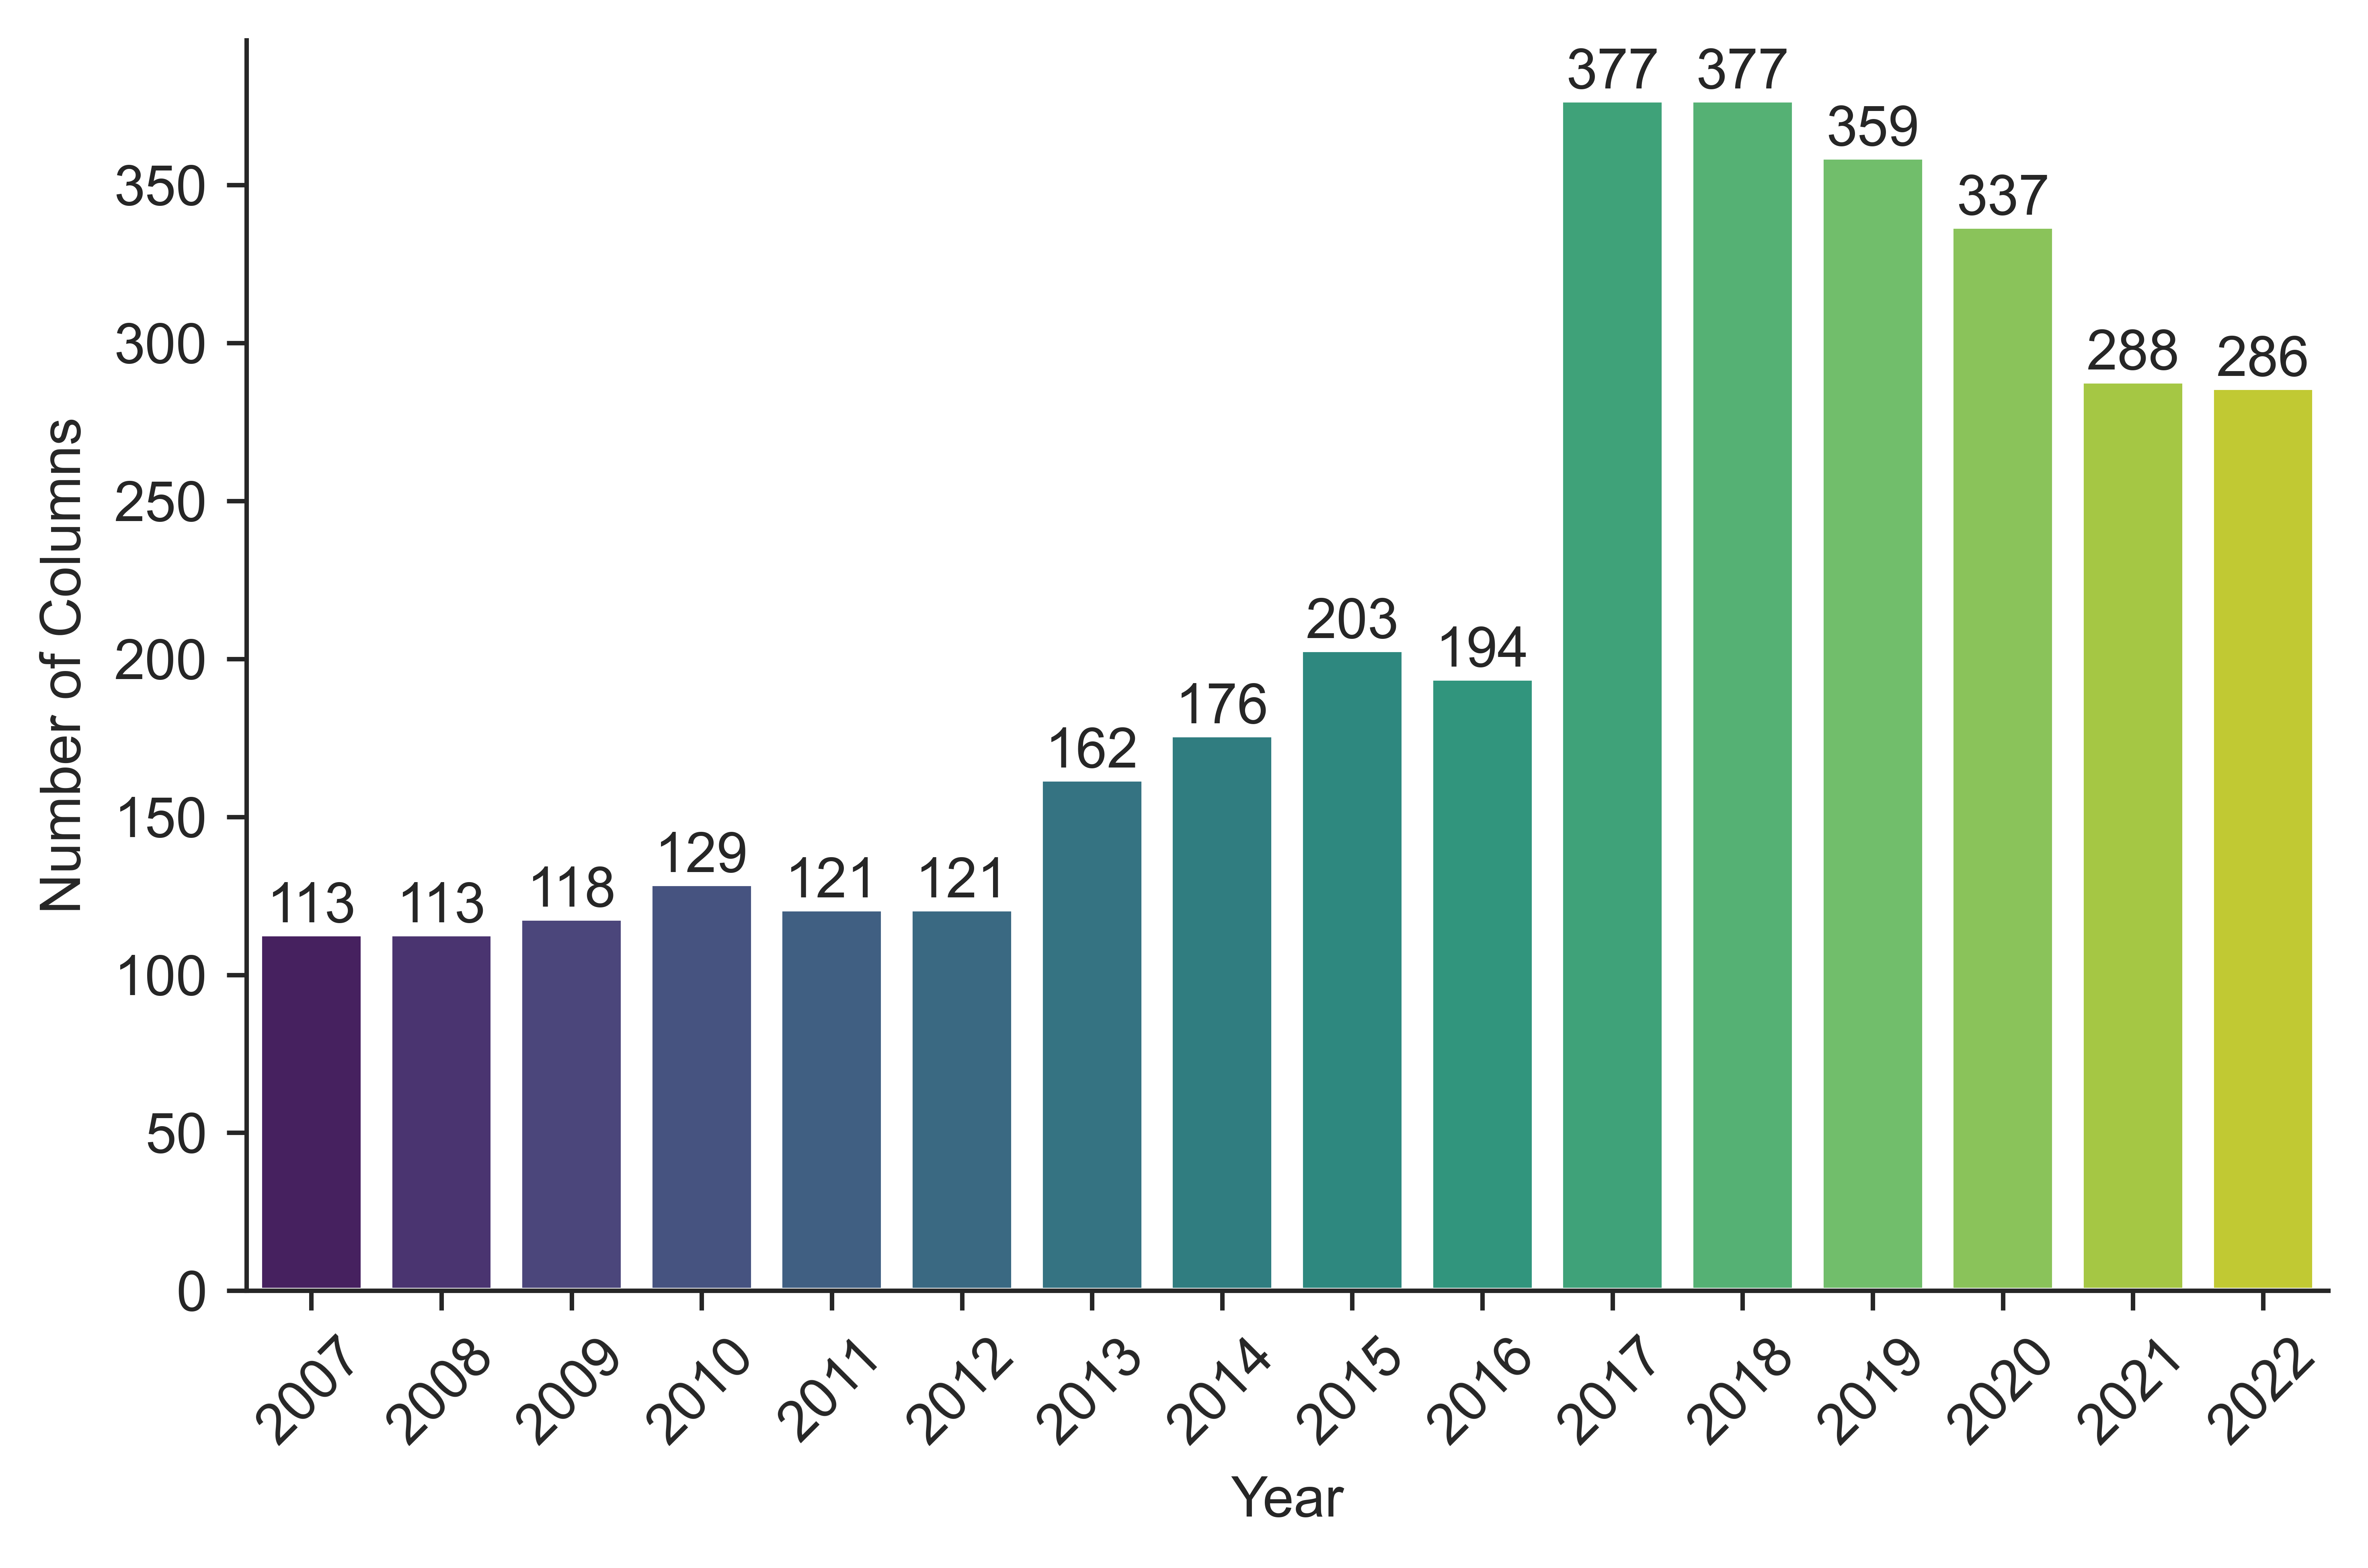

In [16]:
graph_df = graph_df.astype(int)
sns.set_style('darkgrid', {"axes.facecolor": ".9"})
sns.set_style(style='ticks', rc={"axes.spines.right": False, "axes.spines.top": False})
sns.color_palette("viridis", as_cmap=True)
ax = sns.barplot(data=graph_df, x='Year', y='Number of Columns', palette='viridis')
ax.bar_label(ax.containers[0], fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
mpl.rcParams['figure.dpi'] = 1000
plt.savefig('/Users/JakeCanfield/Documents/Trauma_Surgery_Research/Data/User_Manuals/julian_datafields_figure.png', dpi=1000)
plt.show()

# Attempt to merge all years and files into one `DataFrame`
<div class="alert alert-block alert-info">
<a href="#Table-of-Contents">Back to top</a></div>

### Proof of concept

In [110]:
df1 = pd.DataFrame([[1,'a',3],[1,'b',6],[7,'c',9]], columns=['INC_KEY','A','B'])
df2 = pd.DataFrame([[1,1],[1,12]], columns=['INC_KEY','C'])
display(df1)
display(df2)
df3 = pd.concat([df1, df2], join='outer', axis=0, sort=False)
display(df3)
grouped = df3.groupby('INC_KEY').agg(lambda x: list(x.dropna()))
grouped = grouped.reset_index()

def replace_empty_list_with_nan(value): # Courtesy of ChatGPT 3.5
    if isinstance(value, list) and len(value) == 0:
        return np.nan
    else:
        return value
    
df_replaced = grouped.applymap(replace_empty_list_with_nan)
display(df_replaced)

,INC_KEY,A,B
0,1,a,3
1,1,b,6
2,7,c,9


,INC_KEY,C
0,1,1
1,1,12


,INC_KEY,A,B,C
0,1,a,3.0,NaN
1,1,b,6.0,NaN
2,7,c,9.0,NaN
0,1,NaN,NaN,1.0
1,1,NaN,NaN,12.0


,INC_KEY,A,B,C
0,1,"[a, b]","[3.0, 6.0]","[1.0, 12.0]"
1,7,[c],[9.0],NaN


### Data too large to load into memory

> Can barely get all of the data to load  in if using only `2007 - 2008`, let aline the whole dataset. So need to devise a couple solutions on how to circumvent this. Ideas include only loading in chunks of data in at a time, trying to run this on my PC (`64 GB RAM`) or needing to reduce the number of files being combined/ clustering them together based on a some topic (i.e. Vital signs/ medical data, demographics, etc).

#### Create list of then unique headers for all data files

In [2]:
data_fp = '/Users/JakeCanfield/Documents/Trauma_Surgery_Research/Data/Raw_data/PUF AY %i/CSV/*'
years = range(2007, 2023)
all_file_cols = []
for year in years:
    files = glob.glob(data_fp%year)
    for file in files:
        file_df = pd.read_csv(file, encoding='latin-1')
        file_df.columns = map(str.upper, file_df.columns)
        file_cols = file_df.columns.tolist()
        if 'INC_KEY' in file_cols:
            [all_file_cols.append(i) for i in file_cols]
        else:
            pass
unique_file_cols = np.unique(all_file_cols)

/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Create a dataframe using unique headers

In [3]:
combined_files_df = pd.DataFrame(columns=unique_file_cols)
display(combined_files_df)

,ABUSEINVESTIGATION,ABUSEINVESTIGATION_BIU,ABUSEREPORT,ABUSEREPORT_BIU,ADDITIONALECODE1,ADDITIONALECODE1_BIU,ADDITIONALECODE2,ADDITIONALECODE2_BIU,ADDITIONALECODEICD10,ADDITIONALECODEICD10_BIU,...,WITHDRAWAL_OF_CARE_CODE,WITHDRAWAL_OF_CARE_DESC,WORKREL,WORKRELATED,WORKRELATED_BIU,YOADMIT,YOBIRTH,YODISCH,YOINJ,YOPROC


#### Each year create file that contains all columns and respective data

In [ ]:
data_fp = '/Users/JakeCanfield/Documents/Trauma_Surgery_Research/Data/Raw_data/PUF AY %i/CSV/*'
years = range(2007, 2008)
for year in years:
    combined_year_df = pd.DataFrame(columns=unique_file_cols)
    files = glob.glob(data_fp%year)
    for file in files:
        file_df = pd.read_csv(file, encoding='latin-1')
        file_df.columns = map(str.upper, file_df.columns)
        file_cols = file_df.columns.tolist()
        if 'INC_KEY' in file_cols:
            filename = file[(len(data_fp)+1):]
            file_df['Filename'] = filename
            file_df['Year'] = year
            combined_year_df = pd.concat([combined_year_df,file_df], axis=0, join='outer', sort=False)
        else:
            pass
    display(combined_year_df)

In [ ]:
data_fp = '/Users/JakeCanfield/Documents/Trauma_Surgery_Research/Data/Raw_data/PUF AY %i/CSV/*'
years = range(2007, 2023)
combined_files_list = []
for year in years:
    files = glob.glob(data_fp%year)
    for file in files:
        file_df = pd.read_csv(file, encoding='latin-1')
        file_df.columns = map(str.upper, file_df.columns)
        if 'PUF_PCODE.csv' in file:
            file_df['YOPROC'] = file_df['YOPROC'].fillna(year)
        else:
            pass
        file_df['Year'] = year
        file_cols = file_df.columns.tolist()
        if 'INC_KEY' in file_cols:
            filename = file[(len(data_fp)+1):]
            file_df['Filename'] = filename
            combined_files_list.append(file_df)
        elif 'Inc_Key' in file_cols:
            filename = file[(len(data_fp)+1):]
            file_df['Filename'] = filename
            combined_files_list.append(file_df)
        elif 'inc_key' in file_cols:
            filename = file[(len(data_fp)+1):]
            file_df['Filename'] = filename
            combined_files_list.append(file_df)
        else:
            pass
combined_files_df = pd.concat(combined_files_list, axis=0, join='outer', sort=False)
grouped_files = combined_files_df.groupby('INC_KEY').agg(lambda x: list(x.dropna()))
grouped_files = grouped_files.reset_index()

def replace_empty_list_with_nan(value):
    if isinstance(value, list) and len(value) == 0:
        return np.nan
    else:
        return value
    
combined_NTDB_files = grouped_files.applymap(replace_empty_list_with_nan)
combined_NTDB_files.to_csv('/Users/JakeCanfield/Documents/Trauma_Surgery_Research/Data/Combined_data/combined_raw_data_files.csv')
display(combined_NTDB_files.head())
        

/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/JakeCanfield/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### While testing above code encountered the importance of  `pass` function

> Need to be careful that I am not using `continue` function **unless** trying to exit iteration of loop when encountered (*not how I usually intend to use it*). Therefore, I need to go back to old code and replace all `continue` functions with `pass` instead.

#### Undesireable effect of `continue`

> **Notice** how loop is exited at `line 8` anytime the first `if` condition is not met, despite the intention being to continue on to the subsequent `if` statements.

In [37]:
a = [1,2,3]

for i in a:
    print(i)
    if i == 1:
        print('OK')
    else:
        continue
    if i == 2:
        print('lol')
    else:
        continue
    if i == 3:
        print('worked')
    else:
        continue

1
OK
2
3


#### Intended outcome using `pass`

> Here we get the intended result in which the iterable `i` is passed on to each of the subsequent `if` statements.

In [35]:
a = [1,2,3]

for i in a:
    print(i)
    if i == 1:
        print('OK')
    else:
        pass
    if i == 2:
        print('lol')
    else:
        pass
    if i == 3:
        print('worked')
    else:
        pass

1
OK
2
lol
3
worked
